图片数据维度： (1348, 62, 47)
图片二维数据维度： (1348, 2914)
逆转升维维度： (1348, 2914)
降维后特征向量： (150, 2914)
降维后数据： (1348, 150)


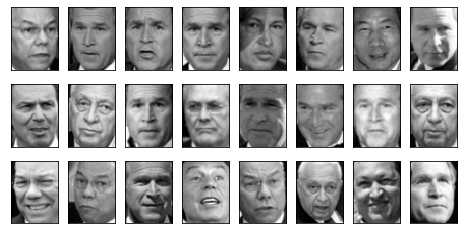

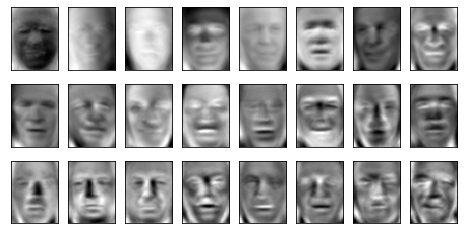

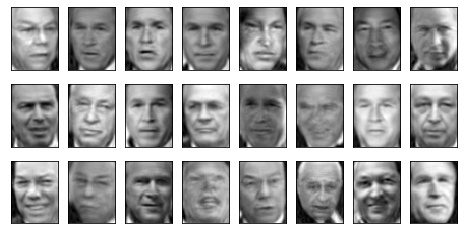

In [56]:
#读取人脸数据
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

faces=fetch_lfw_people(data_home="d:/test/face",min_faces_per_person=60)
print("图片数据维度：",faces.images.shape) #数据维度：1348张照片，每张照片是一个62*47=2914的矩阵
print("图片二维数据维度：",faces.data.shape)
X=faces.data #sklearn降维算法只接受二维特征矩阵，把数据换成特征矩阵，维度是1348*2914，

X = faces.data
# 在matplotlib中，整个图像为一个Figure对象。在Figure对象中可以包含一个或者多个Axes对象
# figsize代表画布的大小 3行8列表示子图axes大小
fig, axes = plt.subplots(3,8 #创建一个画布有3*8个子图
                         ,figsize = (8,4) #创建一个大小为8*4的黄布
                         ,subplot_kw = {"xticks":[],"yticks":[]} # 每个子图都不显示坐标轴
                        )
for i,ax in enumerate(axes.flat):
    ax.imshow(faces.images[i,:,:], cmap = "gray")

pca=PCA(n_components=150)
V1 = pca.fit_transform(X)
x_inv = pca.inverse_transform(V1) #不升维，维度和原始数据不一样无法转成(62, 47)图像
print("逆转升维维度：",x_inv.shape)
V = pca.components_
print("降维后特征向量：",V.shape)
print("降维后数据：",V1.shape)
fig, axes = plt.subplots(3,8 #创建一个画布有3*8个子图
                         ,figsize = (8,4) #创建一个大小为8*4的黄布
                         ,subplot_kw = {"xticks":[],"yticks":[]} # 每个子图都不显示坐标轴
                        )
for i,ax in enumerate(axes.flat):
    ax.imshow(V[i,:].reshape(62,47), cmap = "gray")

fig, axes = plt.subplots(3,8 #创建一个画布有3*8个子图
                         ,figsize = (8,4) #创建一个大小为8*4的黄布
                         ,subplot_kw = {"xticks":[],"yticks":[]} # 每个子图都不显示坐标轴
                        )
for i,ax in enumerate(axes.flat):
    ax.imshow(x_inv[i].reshape(62, 47), cmap='binary_r') 

